<a href="https://colab.research.google.com/github/neetuaashi/NeetuSingh/blob/master/Data_exploration_Master_Prostrate_Cancer_CNN_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/PCA_STAGE_BASED_CLASSIFICATION.xlsx')
train_data.head()

,PCA_STAGE,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
0,pT3a,7.604725,5.93074,9.28309,7.242785,7.005525,7.14975,9.247600,7.486895,7.33985,...,6.59991,7.21917,5.038410,6.37504,6.64386,7.33092,7.816270,8.062970,7.10852,2
1,N_1,6.465740,6.08746,8.97728,7.531295,7.266755,7.40939,9.919400,7.479640,7.62205,...,9.45943,6.91886,5.101065,6.84549,5.93074,7.70044,8.787070,7.266755,7.37504,0
2,pT3b,7.317235,6.58496,8.29002,7.139515,7.339600,7.63662,9.137920,7.179600,7.15987,...,6.37504,7.41785,4.649605,7.14975,6.65821,7.49985,8.611960,7.751460,7.43463,3
3,N_2,6.445800,6.85798,8.85175,7.647455,7.503820,7.82655,9.880605,7.266755,7.43463,...,7.46761,7.42626,5.409290,7.24793,6.20945,7.08746,9.476720,7.320545,7.24793,0
4,pT3a,7.021685,6.32193,8.47978,7.554565,7.441775,7.89482,9.462780,7.004740,7.05528,...,6.33985,7.15987,4.779210,6.94251,6.18982,7.62936,8.183205,6.766785,7.88264,2


Data Wrangling

In [ ]:
train_data.isnull().sum()

PCA_STAGE      0
GSHG0000008    0
GSHG0000017    0
GSHG0000018    0
GSHG0000026    0
              ..
GSHG0051591    0
GSHG0051597    0
GSHG0051601    0
GSHG0051602    0
Outcome        0
Length: 16204, dtype: int64

In [ ]:

train_data = train_data.drop(['PCA_STAGE'], axis = 1)

In [ ]:
train_data.describe(include='all')

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,7.625409,6.553247,8.846202,7.372088,7.318127,7.561067,9.181256,7.390135,7.445572,7.756067,...,6.514587,7.27745,5.301960,6.799834,6.539014,7.645078,7.905435,7.511536,7.224324,1.970803
std,0.584810,0.869841,0.553860,0.290280,0.367854,0.281973,0.490373,0.239411,0.205667,0.131994,...,0.663130,0.34585,1.245742,0.283978,0.193859,0.273548,0.714546,0.932111,0.484999,1.042773
min,6.419995,4.954200,7.507790,6.820120,6.467025,6.794420,7.005525,6.693470,6.807350,7.405085,...,5.087460,6.35755,4.000000,6.022370,5.930740,6.857980,6.257360,4.599835,5.754890,0.000000
25%,7.278610,6.000000,8.471670,7.144575,7.049835,7.392320,8.929960,7.255875,7.294620,7.668845,...,6.087460,7.05528,4.488640,6.599910,6.409390,7.467610,7.446085,6.941320,6.930740,1.000000
50%,7.604725,6.442940,8.787900,7.335385,7.299490,7.562240,9.175835,7.353085,7.434630,7.748190,...,6.491850,7.31288,4.928990,6.794420,6.523560,7.686500,7.897585,7.569835,7.219170,2.000000
75%,8.102130,6.942510,9.228820,7.546890,7.566010,7.768180,9.446790,7.495585,7.569860,7.832835,...,6.845490,7.56986,5.629285,6.977280,6.672430,7.807350,8.315065,8.233610,7.539160,3.000000
max,8.897390,9.867280,10.364100,8.372390,8.424700,8.257390,10.436300,8.597620,8.060700,8.154735,...,9.459430,7.99435,9.720245,7.554590,6.977280,8.312880,9.964890,9.732690,8.379380,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc520b94be0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7fc520b90430>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7fc520b94640>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x7fc520b90b80>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc51cca6490>,
  ...],
 'means': []}

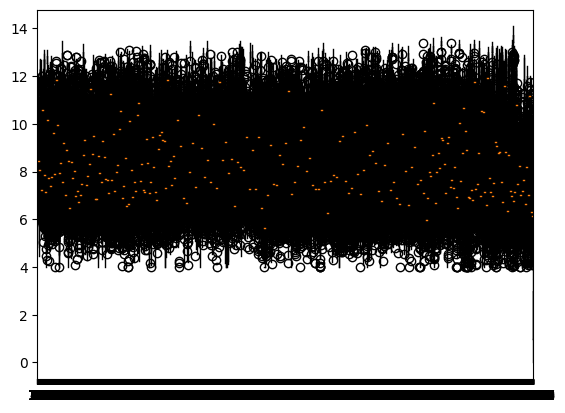

In [ ]:
plt.boxplot(train_data)

In [ ]:
# to check correlation beween independent features
train_data.corr()

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
GSHG0000008,1.000000,-0.122974,-0.088349,-0.374764,-0.389580,-0.261281,-0.442279,0.009938,-0.268359,0.049678,...,-0.107820,0.346219,0.266779,-0.083206,0.464599,0.225601,-0.266356,0.246763,0.096897,0.034729
GSHG0000017,-0.122974,1.000000,0.189959,0.363409,0.123600,0.024211,0.123709,-0.066141,0.193066,-0.033415,...,-0.044098,-0.011886,-0.090996,-0.061755,-0.067999,-0.004518,0.137672,0.196456,0.070474,0.235471
GSHG0000018,-0.088349,0.189959,1.000000,0.029175,0.394447,-0.177881,0.268190,0.123215,0.297356,0.341180,...,-0.068953,0.184582,0.037796,-0.365853,0.032809,0.005991,-0.313153,0.080879,-0.123534,0.213790
GSHG0000026,-0.374764,0.363409,0.029175,1.000000,0.295004,0.341352,0.346313,0.222309,0.445415,0.106378,...,-0.004080,-0.314835,-0.017155,0.096077,-0.275572,-0.277681,0.115334,-0.096748,0.141785,0.148011
GSHG0000027,-0.389580,0.123600,0.394447,0.295004,1.000000,0.252512,0.370966,0.066554,0.425165,0.233652,...,-0.251513,-0.103548,-0.133973,-0.043598,-0.296168,-0.342520,-0.082395,-0.168029,-0.186870,0.042310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSHG0051591,0.225601,-0.004518,0.005991,-0.277681,-0.342520,-0.300315,-0.333179,0.064610,-0.060204,0.028843,...,-0.064523,0.203759,0.159564,-0.050144,0.322089,1.000000,-0.145761,-0.039778,-0.050874,0.156236
GSHG0051597,-0.266356,0.137672,-0.313153,0.115334,-0.082395,0.050147,0.270701,-0.305743,-0.205116,-0.388912,...,0.459231,-0.072475,-0.142821,0.183134,-0.279899,-0.145761,1.000000,0.268502,0.337203,-0.334866
GSHG0051601,0.246763,0.196456,0.080879,-0.096748,-0.168029,-0.132528,0.174023,-0.290520,-0.223215,-0.168326,...,0.410131,0.171443,0.056445,-0.143977,0.102285,-0.039778,0.268502,1.000000,0.276451,-0.170796
GSHG0051602,0.096897,0.070474,-0.123534,0.141785,-0.186870,-0.044017,0.105326,-0.219983,-0.270288,-0.259279,...,0.323464,0.082698,0.144221,0.028864,-0.089731,-0.050874,0.337203,0.276451,1.000000,-0.244328


In [ ]:
#plt.figure(figsize =(10,10)
#sns.heatmap(train_data.corr())

In [ ]:
train_data.shape

(137, 16203)

In [ ]:
train_data['Outcome'] = train_data['Outcome'].astype('int')


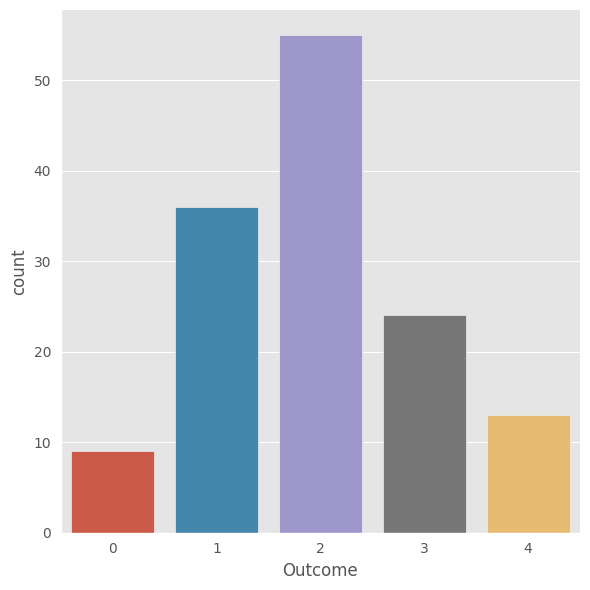

In [ ]:
# Display counts of classes
sns.catplot(x = 'Outcome', kind = "count", data = train_data, height = 6)

In [ ]:
train_data['Outcome'].value_counts()

2    55
1    36
3    24
4    13
0     9
Name: Outcome, dtype: int64

In [ ]:
# Splitting data into classes
df_0 = train_data[train_data['Outcome'] == 0]
df_1 = train_data[train_data['Outcome'] == 1]
df_2 = train_data[train_data['Outcome'] == 2]
df_3 = train_data[train_data['Outcome'] == 3]
df_4 = train_data[train_data['Outcome'] == 4]

In [ ]:
# Resample using "Bootstrapping" method to regenerate samples by upsampling for each class.
from sklearn.utils import resample

In [ ]:
df_0_upsample = resample(df_0, n_samples = 100, replace = True, random_state = 123)
df_1_upsample = resample(df_1, n_samples = 100, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 100, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 100, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 100, replace = True, random_state = 123)

In [ ]:
# Merge all dataframes to create new train samples
train_df = pd.concat([df_0_upsample, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
train_df['Outcome'].value_counts()

0    100
1    100
2    100
3    100
4    100
Name: Outcome, dtype: int64

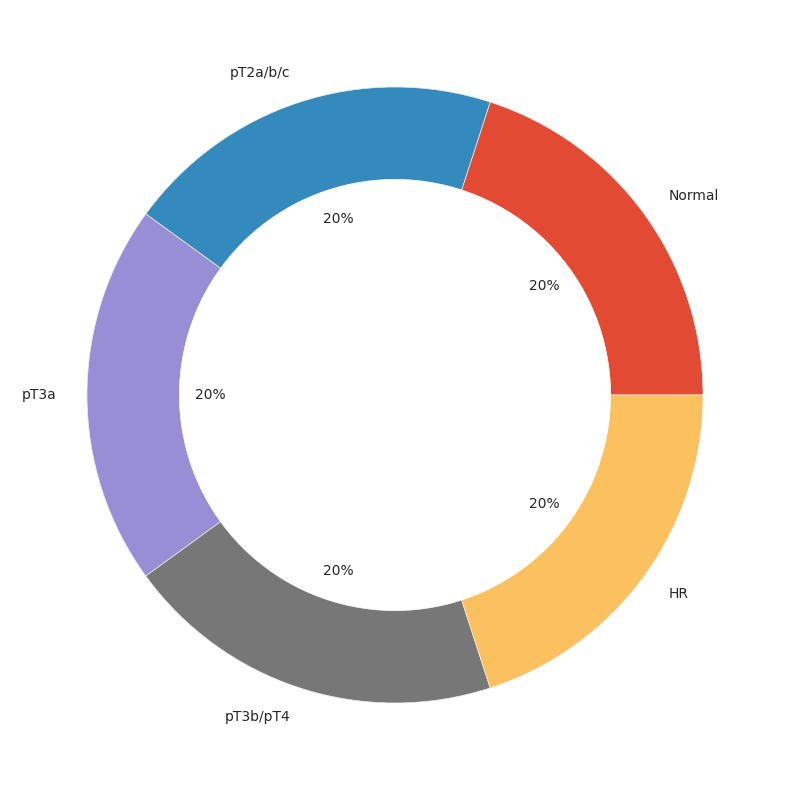

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df['Outcome'].value_counts(), labels = ['Normal','pT2a/b/c','pT3a',
                                                  'pT3b/pT4', 'HR'], autopct = '%0.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
X = train_df.drop('Outcome', axis = 1)
Y = train_df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
x_train.shape

(400, 16202)

In [ ]:
x_test.shape

(100, 16202)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0.

In [ ]:
x_train = x_train.iloc[:, :-1].values
x_test = x_test.iloc[:, :-1].values

x_train.shape

(400, 16201)

In [ ]:
x_train = x_train.reshape(len(x_train), x_train.shape[1], 1)
x_test = x_test.reshape(len(x_test), x_test.shape[1], 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape( x_test.shape[0],x_train.shape[1], 1)

In [ ]:
x_train.shape

(400, 16201, 1)

In [ ]:
x_train [0]

array([[7.03136 ],
       [7.11894 ],
       [8.89482 ],
       ...,
       [7.29462 ],
       [6.25736 ],
       [8.201625]])

In [ ]:
x_test.shape

(100, 16201, 1)

CNN 1D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
# Avoid Overfitting of NN by Normalizing the samples
from tensorflow.keras.layers import BatchNormalization

In [ ]:
def build_model():
    model = Sequential()
    # Filters = No. of Neurons
    # Padding = 'same' : Zero Padding; Padding = 'valid' : valid padding
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (16201,1)))
    # BatchNormalization to avoid overfitting
    model.add(BatchNormalization())
    # Pooling
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - II
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Conv Layer - III
    model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(2), strides=(2), padding='same'))

    # Flatten
    model.add(Flatten())

    # Fully Connected Layer (FC - Layer)
    model.add(Dense(units = 64, activation='relu'))
    # Hidden Layer
    model.add(Dense(units = 64, activation='relu'))
    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

model = build_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 16201, 64)         384       
                                                                 
 batch_normalization_6 (Batc  (None, 16201, 64)        256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 8101, 64)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 8101, 64)          20544     
                                                                 
 batch_normalization_7 (Batc  (None, 8101, 64)         256       
 hNormalization)                                                 
                                                      

In [ ]:
history = model.fit(x_train, y_train, epochs = 15, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/15
13/13 [==============================] - 50s 4s/step - loss: 17.5948 - accuracy: 0.3950 - val_loss: 2.0361 - val_accuracy: 0.2300
Epoch 2/15
13/13 [==============================] - 49s 4s/step - loss: 1.1334 - accuracy: 0.8100 - val_loss: 2.1871 - val_accuracy: 0.2000
Epoch 3/15
13/13 [==============================] - 47s 4s/step - loss: 0.6636 - accuracy: 0.8825 - val_loss: 2.4556 - val_accuracy: 0.2500
Epoch 4/15
13/13 [==============================] - 46s 4s/step - loss: 0.5941 - accuracy: 0.9175 - val_loss: 4.3151 - val_accuracy: 0.3000
Epoch 5/15
13/13 [==============================] - 45s 3s/step - loss: 0.1034 - accuracy: 0.9650 - val_loss: 6.9359 - val_accuracy: 0.1900
Epoch 6/15
13/13 [==============================] - 53s 4s/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 9.0002 - val_accuracy: 0.1900
Epoch 7/15
13/13 [==============================] - 49s 4s/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 10.9663 - val_accuracy: 0.2500
Epoch 8/15
13/13 [

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,17.594835,0.3950,2.036114,0.23
1,1.133371,0.8100,2.187089,0.20
2,0.663575,0.8825,2.455591,0.25
3,0.594069,0.9175,4.315104,0.30
4,0.103443,0.9650,6.935891,0.19
5,0.045677,0.9850,9.000237,0.19
6,0.032841,0.9900,10.966344,0.25
7,0.021969,0.9925,13.418191,0.19
8,0.055812,0.9875,13.807773,0.27
9,0.002223,0.9975,14.271913,0.20


<Axes: >

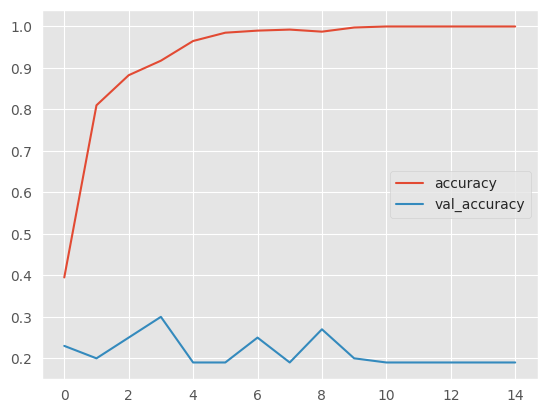

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

<Axes: >

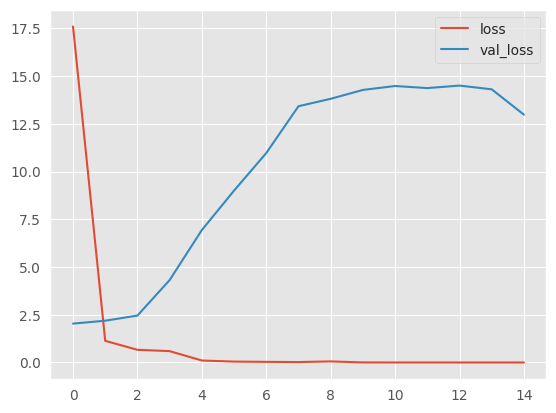

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
# Classification Report

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 2s 390ms/step - loss: 12.9785 - accuracy: 0.1900


[12.978462219238281, 0.1899999976158142]

In [ ]:
# Make Prediction
predict = model.predict(x_test)

4/4 [==============================] - 2s 551ms/step


In [ ]:
predict

array([[7.33512752e-06, 9.99992549e-01, 3.75107050e-14, 1.01022177e-08,
        1.30551104e-14],
       [5.51379706e-08, 9.99999344e-01, 1.39006929e-13, 6.34483797e-07,
        1.48666059e-13],
       [2.04640045e-07, 9.99999583e-01, 4.78214202e-13, 1.75707257e-07,
        2.59903793e-10],
       [9.93463800e-07, 9.99998987e-01, 9.35635982e-15, 1.17359429e-08,
        6.64490677e-16],
       [5.68383257e-06, 9.99994099e-01, 2.50286033e-12, 1.44703478e-07,
        8.76144521e-14],
       [1.44515343e-06, 9.99982893e-01, 5.84696458e-11, 1.56441365e-05,
        2.21833840e-08],
       [6.16997704e-02, 9.38299894e-01, 2.71861866e-09, 2.49015017e-07,
        8.93154127e-12],
       [6.32301322e-08, 9.99999821e-01, 3.38388339e-16, 6.21284357e-10,
        8.92454106e-14],
       [1.24770540e-05, 9.99969423e-01, 3.71351699e-11, 1.80454335e-05,
        8.51911152e-13],
       [5.84468762e-05, 9.99901116e-01, 3.53995278e-10, 4.04100210e-05,
        2.78575492e-12],
       [9.62182185e-07, 9.9998

In [ ]:
yhat = np.argmax(predict, axis = 1)

In [ ]:
# Distributed probability to discrete class
yhat = np.argmax(predict, axis = 1)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(x_test,yhat )

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix( x_test,yhat ), annot = True, cmap = 'RdPu', fmt = '0.0f')

ValueError: ignored

In [ ]:
print(classification_report(target_test,yhat))